# Length Of Stay COVID-19 Patients

### documentation:  

* forsight: https://pages.github.cerner.com/foresight/foresight/machine_learning.html
* spark mllib:  https://spark.apache.org/docs/latest/ml-guide.html
* spark sql built-in functions: https://spark.apache.org/docs/latest/api/sql/
* spark sql:  https://spark.apache.org/docs/latest/sql-programming-guide.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
spark.sparkContext.applicationId

'application_1637383778039_0163'

In [3]:
pd.options.display.max_columns = 35

In [4]:
# from foresight.discern import broadcast_discern, push_discern, pop_discern

# ### care management new default will be 5e259fd5-75b5-4d49-82d3-2d4e92dca831 for any new clients or 
# ###  any algorithm wiki not line for line with Cerner Standard then would be using the new context  

# pd.set_option('display.max_colwidth', None)

# # Location of the discernontology database
# root = 's3://consult-datalab-persistence-s3-data/discernontology/v1/'   ##<------------- change it to your stack without the v1/

# contextid = ['da0acee6-1e2e-4384-9fc7-a58c259d0c50', '5E259FD575B54D4982D32D4E92DCA831'] 

# # Loop that removes all hypthens and captializes all letters. Sets up the file location
# for contextid in contextid:
#     contextid = contextid.upper().replace("-", "")
#     push_discern(spark, contextid, discern_root=root)
#     print(contextid)

# defaultcontext = 'DA0ACEE61E2E43849FC7A58C259D0C50'   
# defaultcontext1 = '5E259FD575B54D4982D32D4E92DCA831' 

In [5]:
db = "real_world_data_2021_Q2"
spark.sql("USE {}".format(db))
print("Using database: {},".format(db))

Using database: real_world_data_2021_Q2,


### Create Variables for Queries

In [6]:
spark.sql('show tables').toPandas()

,database,tableName,isTemporary
0,real_world_data_2021_q2,allergy,False
1,real_world_data_2021_q2,clinical_event,False
2,real_world_data_2021_q2,condition,False
3,real_world_data_2021_q2,demographics,False
4,real_world_data_2021_q2,encounter,False
5,real_world_data_2021_q2,immunization,False
6,real_world_data_2021_q2,lab,False
7,real_world_data_2021_q2,measurement,False
8,real_world_data_2021_q2,medication,False
9,real_world_data_2021_q2,medication_administration,False


In [7]:
# Look back days variables
daysInterval = 365
print(daysInterval)
maxDays = 365
print(maxDays)
oneYearInterval=365
print(oneYearInterval)

# Username variable
user_id = 'rc047407'           ####<-------------------- change to your user id (Ex: tl068507)
userName = 'user_' + user_id
print(userName)

# Algorithm name variable
algorithmName='CoronavirusLengthOfStay_HighLevel'
print(algorithmName)

365
365
365
user_rc047407
CoronavirusLengthOfStay_HighLevel


In [8]:
spark.sql("""CREATE SCHEMA IF NOT EXISTS {userName}""".format(**{
    'userName':userName
})).show()

++
||
++
++



## Create DataFrame

In [9]:
sparkDF = spark.sql(f"""
  select * from {userName}.{algorithmName}_Final_Vac
  order by 1
""")

In [10]:
inputs_and_truth = sparkDF

## Model Inputs

At this point we now have all input features and ground truth computed for the model to consume for training and then validation.

In [11]:
%%time

inputs_and_truth.count()

CPU times: user 3.63 ms, sys: 0 ns, total: 3.63 ms
Wall time: 23.3 s


544

In [12]:
%%time

inputs_and_truth.limit(5).toPandas()

CPU times: user 192 ms, sys: 0 ns, total: 192 ms
Wall time: 5.51 s


,length_of_stay,bed_size_index,discharge_to_index,age_range,tenant_zip_code,zip_code,deceased,discharged_to_skilled_nursing_facility,discharged_to_hospice,died_in_the_hospital,discharged_to_rehab_facility,discharged_to_long_term_care_facility,intensive_care_visit,intensive_care_medical_service,palliative_care_visit,palliative_care_medical_service,hospice_care_visit,...,taken_albuterol_90_mcg_inh_inhalation_aerosol_drugcode,taken_sodium_chloride_drugcode,taken_protonix_drugcode,taken_insulin_glargine_drugcode,taken_sodium_bicarbonate_drugcode,taken_oxycodone_drugcode,taken_zinc_sulfate_drugcode,taken_famotidine_drugcode,taken_amiodarone_drugcode,taken_sodium_chloride_09percent_injectable_solution_drugcode,taken_doxycycline_drugcode,taken_miralax_drugcode,taken_amlodipine_drugcode,taken_vitamin_c_drugcode,taken_dextrose_drugcode,taken_bamlanivimab_drugcode,taken_fluvoxamine_drugcode
0,1,4,3,55,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,1,1,0,55,6,6,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,55,6,6,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,3,55,5,5,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,0,55,6,6,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Train Model

In [13]:
# from pyspark.ml.feature import StringIndexer

# df=inputs_and_truth

# indexer = StringIndexer(inputCol="tenant_bed_size", outputCol="tenant_bed_sizeIndex")
# df = indexer.fit(df).transform(df)
# indexer = StringIndexer(inputCol="tenant_speciality", outputCol="tenant_specialityIndex")
# df = indexer.fit(df).transform(df)
# indexer = StringIndexer(inputCol="tenant_segment", outputCol="tenant_segmentIndex")
# df = indexer.fit(df).transform(df)
# indexer = StringIndexer(inputCol="tenant_zip_code", outputCol="tenant_zip_codeIndex")
# df = indexer.fit(df).transform(df)
# indexer = StringIndexer(inputCol="zip_code", outputCol="zip_codeIndex")
# df = indexer.fit(df).transform(df)
# indexer = StringIndexer(inputCol="gender", outputCol="genderIndex")
# df = indexer.fit(df).transform(df)

# df.show()

In [14]:
#df = df.toPandas()

In [15]:
df = inputs_and_truth.limit(5).toPandas()

### get a list of features and do not include the independent variable and empiPersonId

In [16]:
feature_list = []
for col in df:
    if  col == 'tenant' \
        or col == 'personId'  \
        or col == 'encounterId' \
        or col == 'procedureId' \
        or col == 'serviceDate' \
        or col == 'dischargeDate' \
        or col == 'effectiveDate' \
        or col == 'startDate' \
        or col == 'stopDate' \
        or col == 'serviceStartDate' \
        or col == 'serviceEndDate' \
        or col == 'vaccine_date'  \
        or col == 'encounterType' \
        or col == 'tenant_bed_size' \
        or col == 'bed_size_index' \
        or col == 'tenant_speciality' \
        or col == 'tenant_segment' \
        or col == 'tenant_zip_code' \
        or col == 'zip_code' \
        or col == 'gender' \
        or col == 'deceased' \
        or col == 'discharged_to_skilled_nursing_facility' \
        or col == 'discharged_to_hospice' \
        or col == 'died_in_the_hospital' \
        or col == 'discharged_to_rehab_facility' \
        or col == 'discharged_to_long_term_care_facility' \
        or col == 'discharged_to_index' \
        or col == 'label' \
        or col == 'length_of_stay' :
        continue
    else:
        feature_list.append(col)
        
print(feature_list)

['discharge_to_index', 'age_range', 'intensive_care_visit', 'intensive_care_medical_service', 'palliative_care_visit', 'palliative_care_medical_service', 'hospice_care_visit', 'hospice_care_medical_service', 'gender_index', 'vaccinated', 'taken_Moderna_vaccine', 'taken_Pfizer_vaccine', 'taken_Janssen_vaccine', 'taken_Unspecified_vaccine', 'taken_Non_US_vaccine', 'taken_single_dose', 'taken_multiple_doses', 'has_ABDOMINAL_PAIN_CLIN', 'has_ACUTE_RESPIRATORY_FAILURE_CLIN', 'has_ADVANCED_ILLNESS_CLIN', 'has_ALCOHOL_ABUSE_OR_DEPENDENCE_CLIN', 'has_ANEMIA_CLIN', 'has_ANXIETY_CLIN', 'has_AORTIC_STENOSIS_CLIN', 'has_ARRHYTHMIA_CLIN', 'has_ASTHMA_CLIN', 'has_ATHEROSCLEROSIS_CLIN', 'has_ATRIAL_FIBRILLATION_CLIN', 'has_ATRIAL_FLUTTER_CLIN', 'has_BACTERIAL_INFECTION_OTHER_CLIN', 'has_BED_BOUND_CLIN', 'has_BENIGN_PROSTATIC_HYPERPLASIA_CLIN', 'has_BIPOLAR_DISORDER_CLIN', 'has_BMI_ABOVE_NORMAL_ADULT_CLIN', 'has_BMI_ABOVE_NORMAL_SENIOR_ADULT_CLIN', 'has_BMI_BELOW_NORMAL_ADULT_CLIN', 'has_BMI_BELOW_NOR

In [17]:
# feature_list2 = feature_list
# feature_list2.append('length_of_stay')
# feature_list2.append('label')
# # feature_list2.append('tenant')
# # feature_list2.append('personId')
# # feature_list2.append('encounterId')
# new_inputs_and_truth = spark.createDataFrame(df[feature_list2])

##  Assemble feature vector

In [18]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=feature_list,
                                  handleInvalid = "keep",
                                  outputCol='features')

##  Assemble feature indexer
 Automatically identify categorical features, and index them.
 Set maxCategories so features with > 4 distinct values are treated as continuous.

In [19]:
# from pyspark.ml.feature import VectorIndexer

# featureIndexer =\
#     VectorIndexer(inputCol="male", outputCol="indexedFeatures", maxCategories=4).fit(inputs_and_truth)


## Prediction algorithm

The only inputs for the Random Forest model are the label and features. Parameters are assigned in the tuning piece.

In [20]:
from pyspark.ml.regression import RandomForestRegressor

# Train a Decision Tree model.
label='length_of_stay'
rf = RandomForestRegressor(labelCol='length_of_stay',
                           featuresCol="features"
                          )

## Assemble Spark ML Pipeline

In [21]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[assembler,
                            rf])

## HYPERPARAMETER GRID

The hyperparameter grid predefines parameter values to test when we run the model. The model is iteratively reevaluated using cross-validation for each combination of parameter values.

Depending on the environment, testing too many parameters may be too computationally expensive and lead to poor performance. Users might consider adaptive sampling techniques to reduce the number of evaluations.

This example tests two parameters each with a list of ten values for each parameter:

numTrees – Number of trees in the forest. This parameter is usually the most important setting
maxDepth – Max number of levels in each decision tree
Some other parameters to consider testing:

featureSubsetStrategy – Number of features to use as candidates for splitting at each tree node
minInfoGain – Minimum information gain for a split to be considered at a tree node
minInstancesPerNode – Minimum number of instances each child must have after split
Parameters that aren’t specified in the grid will use Spark’s default settings.

Note: Beware the parameter defaults. I have realized large performance boosts from increasing values for depth and number of trees, in particular. I suspect Spark ML’s defaults were set low in order to not crush your memory usage.

In [22]:
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np
paramGrid = ParamGridBuilder() \
             .addGrid(rf.maxDepth, [2, 5, 10, 20, 30]) \
             .addGrid(rf.maxBins, [10, 20, 40, 80, 100]) \
             .addGrid(rf.numTrees, [5, 20, 50, 100, 500]) \
             .build()

To evaluate our model and the corresponding “grid” of parameter variables, we use ten folds cross-validation. This method randomly partitions the original sample into three subsamples and uses them for training and validation.

Think of the cross-validation step as the container for testing the parameters we just defined.

In this example, we assign our pipeline to the estimator argument, our parameter grid to the estimatorParamMaps argument, and we import Spark ML’s RegressionEvaluator for the evaluator argument.

In [23]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          numFolds=3)

## Split Inputs into Train and Test datasets.

In [24]:
# Split the data into training and test sets (20% held out for testing)
(train,test) = inputs_and_truth.randomSplit([0.8, 0.2])

##  Fit on Train to produce mode

The model is fit using the CrossValidator we created. This triggers Spark to assess the features and “grow” numerous decision trees using random samples of the training data. The results are recorded for each permutation of the hyperparameters.

In [25]:
train.columns

['length_of_stay',
 'bed_size_index',
 'discharge_to_index',
 'age_range',
 'tenant_zip_code',
 'zip_code',
 'deceased',
 'discharged_to_skilled_nursing_facility',
 'discharged_to_hospice',
 'died_in_the_hospital',
 'discharged_to_rehab_facility',
 'discharged_to_long_term_care_facility',
 'intensive_care_visit',
 'intensive_care_medical_service',
 'palliative_care_visit',
 'palliative_care_medical_service',
 'hospice_care_visit',
 'hospice_care_medical_service',
 'gender_index',
 'label',
 'vaccinated',
 'taken_Moderna_vaccine',
 'taken_Pfizer_vaccine',
 'taken_Janssen_vaccine',
 'taken_Unspecified_vaccine',
 'taken_Non_US_vaccine',
 'taken_single_dose',
 'taken_multiple_doses',
 'has_ABDOMINAL_PAIN_CLIN',
 'has_ACUTE_RESPIRATORY_FAILURE_CLIN',
 'has_ADVANCED_ILLNESS_CLIN',
 'has_ALCOHOL_ABUSE_OR_DEPENDENCE_CLIN',
 'has_ANEMIA_CLIN',
 'has_ANXIETY_CLIN',
 'has_AORTIC_STENOSIS_CLIN',
 'has_ARRHYTHMIA_CLIN',
 'has_ASTHMA_CLIN',
 'has_ATHEROSCLEROSIS_CLIN',
 'has_ATRIAL_FIBRILLATION_CLIN

In [26]:
%%time

# Train model.  This also runs the indexer.
model = crossval.fit(train)

CPU times: user 33.4 s, sys: 11.1 s, total: 44.6 s
Wall time: 37min 34s


## Transform Test with model to get score

In [27]:
%%time

# Make predictions.
predictions = model.transform(test)

CPU times: user 8.77 ms, sys: 17.8 ms, total: 26.6 ms
Wall time: 354 ms


The transformer (i.e. prediction generator) from out cross-validator by default applies the best performing pipeline. We can test our new model by making predictions on the hold out data.

In [28]:
%%time

# Select example rows to display.
predictions.select("prediction", "length_of_stay", "features").show(15)

+----------+--------------+--------------------+
|prediction|length_of_stay|            features|
+----------+--------------+--------------------+
|       1.0|             1|(402,[1,8,9,10,66...|
|       1.0|             1|(402,[1,8,9,10,66...|
|       1.0|             1|(402,[1,8,9,10,66...|
|      1.02|             1|(402,[1,8,9,10,17...|
|      1.02|             1|(402,[1,8,9,10,17...|
|     5.044|             2|(402,[1,8,9,10,69...|
|      2.21|             2|(402,[1,8,9,11,24...|
|     3.134|             3|(402,[1,8,9,10,68...|
|     3.004|             3|(402,[0,1,8,9,10,...|
|     3.004|             3|(402,[0,1,8,9,10,...|
|     5.046|             3|(402,[1,8,9,10,24...|
|     3.202|             3|(402,[1,8,9,11,24...|
|     3.202|             3|(402,[1,8,9,11,24...|
|     4.712|             4|(402,[1,8,9,10,24...|
|     3.994|             4|(402,[1,9,11,66,1...|
+----------+--------------+--------------------+
only showing top 15 rows

CPU times: user 2.88 ms, sys: 987 µs, total

In [29]:
# import matplotlib.pyplot as plt
# evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
# rmse = evaluator.evaluate(predictions)
# rfPred = model.transform(test)
# rfResult = rfPred.toPandas()
# plt.plot(rfResult.label, rfResult.prediction, 'bo')
# plt.xlabel('Price')
# plt.ylabel('Prediction')
# plt.suptitle("Model Performance RMSE: %f" % rmse)
# plt.show()

##  Evaluate

In [30]:
%%time
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol='prediction',
                                          labelCol='length_of_stay',
                                          metricName='rmse')

rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


Root Mean Squared Error (RMSE) on test data = 1.15916
CPU times: user 4.54 ms, sys: 1.56 ms, total: 6.1 ms
Wall time: 8.59 s


In [31]:
%%time

# normally don't score training data, but using all data to demonstrate package.run
scored = model.transform(inputs_and_truth)

scored.limit(3).toPandas()

# scored = model.transform(test)

CPU times: user 228 ms, sys: 5.81 ms, total: 233 ms
Wall time: 10.9 s


,length_of_stay,bed_size_index,discharge_to_index,age_range,tenant_zip_code,zip_code,deceased,discharged_to_skilled_nursing_facility,discharged_to_hospice,died_in_the_hospital,discharged_to_rehab_facility,discharged_to_long_term_care_facility,intensive_care_visit,intensive_care_medical_service,palliative_care_visit,palliative_care_medical_service,hospice_care_visit,...,taken_protonix_drugcode,taken_insulin_glargine_drugcode,taken_sodium_bicarbonate_drugcode,taken_oxycodone_drugcode,taken_zinc_sulfate_drugcode,taken_famotidine_drugcode,taken_amiodarone_drugcode,taken_sodium_chloride_09percent_injectable_solution_drugcode,taken_doxycycline_drugcode,taken_miralax_drugcode,taken_amlodipine_drugcode,taken_vitamin_c_drugcode,taken_dextrose_drugcode,taken_bamlanivimab_drugcode,taken_fluvoxamine_drugcode,features,prediction
0,1,4,3,55,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,"(3.0, 55.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1.094
1,1,4,3,55,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,"(3.0, 55.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1.094
2,1,4,3,55,5,5,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,"(3.0, 55.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1.094


In [32]:
!date --date="6 hour ago" # capture evaluated model end time

Thu Nov 18 07:00:18 UTC 2021


## Root Mean Squared Error

In [33]:
rfModel = model.bestModel.stages
print(rfModel)

[VectorAssembler_0454adf9397d, RandomForestRegressionModel (uid=RandomForestRegressor_6b4fc029f830) with 500 trees]


In [34]:
import matplotlib.pyplot as plt
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
# rfPred = model.transform(inputs_and_truth)
# rfResult = rfPred.toPandas()
# plt.plot(rfResult.label, rfResult.prediction, 'bo')
# plt.xlabel('Length of Stay')
# plt.ylabel('Prediction')
# plt.rcParams["figure.figsize"] = (10,3)
# plt.suptitle("Model Performance RMSE: %f" % rmse)
# plt.show()
rmse

1.1591592635173988

## Mean Squared Error

In [35]:
import matplotlib.pyplot as plt
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
rfPred = model.transform(inputs_and_truth)
# rfResult = rfPred.toPandas()
# plt.plot(rfResult.label, rfResult.prediction, 'bo')
# plt.xlabel('Length of Stay')
# plt.ylabel('Prediction')
# plt.rcParams["figure.figsize"] = (10,3)
# plt.suptitle("Model Performance MSE: %f" % mse)
# plt.show()
mse

1.3436501981981983

## Regression through the origin

In [36]:
import matplotlib.pyplot as plt
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
# rfPred = model.transform(inputs_and_truth)
# rfResult = rfPred.toPandas()
# plt.plot(rfResult.label, rfResult.prediction, 'bo')
# plt.xlabel('Length of Stay')
# plt.ylabel('Prediction')
# plt.rcParams["figure.figsize"] = (10,3)
# plt.suptitle("Model Performance R2: %f" % r2)
# plt.show()
r2

0.7360220350798865

## Mean absolute error

In [37]:
import matplotlib.pyplot as plt
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
# rfPred = model.transform(inputs_and_truth)
# rfResult = rfPred.toPandas()
# plt.plot(rfResult.label, rfResult.prediction, 'bo')
# plt.xlabel('Length of Stay')
# plt.ylabel('Prediction')
# plt.rcParams["figure.figsize"] = (10,3)
# plt.suptitle("Model Performance MAE: %f" % mae)
# plt.show()
mae

0.6510810810810812

## FEATURE IMPORTANCE

Interpretability is very important in machine learning. Non-technical stakeholders are rarely satisfied with predictions coming from a black box. This compels machine learning practitioners to understand which features were most important to the outcomes.

Fortunately, Spark ML accounts for this. The function featureImportances establishes a percentage of how influential each feature is on the model’s predictions.

To isolate the model that performed best in our parameter grid, literally run bestModel. Then, select the Random Forest stage from our pipeline.

Text(0.5, 1.0, 'Feature Importances')

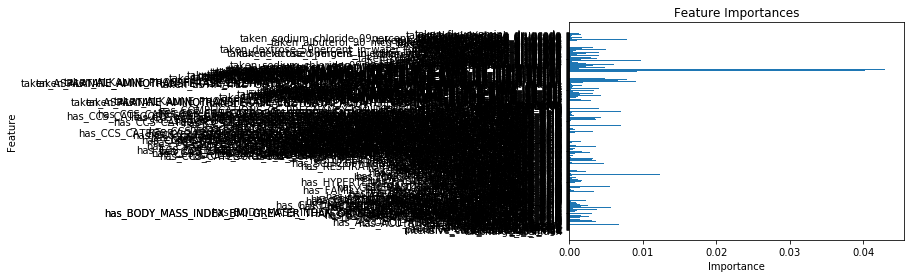

In [38]:
bestPipeline = model.bestModel
bestModel = bestPipeline.stages[1]
importances = bestModel.featureImportances

x_values = list(range(len(importances)))
plt.barh(x_values, importances)
#plt.barh(y_values, importances, orientation = 'horizontal')
plt.yticks(x_values, feature_list)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.rcParams["figure.figsize"] = (150,10)
plt.title('Feature Importances')

In [39]:
x_values = list(range(len(importances)))
print(len(feature_list))
importances_list = importances.values.tolist()
for x in range(0, len(feature_list)-1):
    print("importance: " + str(round(importances[x],4)) + " feature:" + feature_list[x])

402
importance: 0.01 feature:discharge_to_index
importance: 0.0424 feature:age_range
importance: 0.0 feature:intensive_care_visit
importance: 0.0005 feature:intensive_care_medical_service
importance: 0.0 feature:palliative_care_visit
importance: 0.0 feature:palliative_care_medical_service
importance: 0.0 feature:hospice_care_visit
importance: 0.0003 feature:hospice_care_medical_service
importance: 0.0037 feature:gender_index
importance: 0.0 feature:vaccinated
importance: 0.0057 feature:taken_Moderna_vaccine
importance: 0.0068 feature:taken_Pfizer_vaccine
importance: 0.002 feature:taken_Janssen_vaccine
importance: 0.0 feature:taken_Unspecified_vaccine
importance: 0.0 feature:taken_Non_US_vaccine
importance: 0.0 feature:taken_single_dose
importance: 0.0 feature:taken_multiple_doses
importance: 0.0037 feature:has_ABDOMINAL_PAIN_CLIN
importance: 0.0036 feature:has_ACUTE_RESPIRATORY_FAILURE_CLIN
importance: 0.0031 feature:has_ADVANCED_ILLNESS_CLIN
importance: 0.0008 feature:has_ALCOHOL_ABUS

In [40]:
for x in range(0, len(feature_list)-1):
    if round(importances[x],4) > 0:
        print("importance: " + str(round(importances[x],4)) + " feature:" + feature_list[x])

importance: 0.01 feature:discharge_to_index
importance: 0.0424 feature:age_range
importance: 0.0005 feature:intensive_care_medical_service
importance: 0.0003 feature:hospice_care_medical_service
importance: 0.0037 feature:gender_index
importance: 0.0057 feature:taken_Moderna_vaccine
importance: 0.0068 feature:taken_Pfizer_vaccine
importance: 0.002 feature:taken_Janssen_vaccine
importance: 0.0037 feature:has_ABDOMINAL_PAIN_CLIN
importance: 0.0036 feature:has_ACUTE_RESPIRATORY_FAILURE_CLIN
importance: 0.0031 feature:has_ADVANCED_ILLNESS_CLIN
importance: 0.0008 feature:has_ALCOHOL_ABUSE_OR_DEPENDENCE_CLIN
importance: 0.0014 feature:has_ANEMIA_CLIN
importance: 0.0014 feature:has_ANXIETY_CLIN
importance: 0.0002 feature:has_AORTIC_STENOSIS_CLIN
importance: 0.0025 feature:has_ARRHYTHMIA_CLIN
importance: 0.0015 feature:has_ASTHMA_CLIN
importance: 0.0022 feature:has_ATHEROSCLEROSIS_CLIN
importance: 0.0027 feature:has_ATRIAL_FIBRILLATION_CLIN
importance: 0.0015 feature:has_BACTERIAL_INFECTION_OT

## BEST HYPERPARAMETERS

Finally, let’s investigate which parameters performed best. Our ‘Best Model’ object has a series of “get” parameter functions that select out the parameter values which had the highest performance.

In [41]:
print('maxDepth - ', bestModel.getOrDefault('maxDepth'))
print('maxBins - ', bestModel.getOrDefault('maxBins'))
print('numTrees  - ', bestModel.getOrDefault('numTrees'))

maxDepth -  30
maxBins -  20
numTrees  -  500


## Validation Table

In [42]:
spark.sql("DROP TABLE IF EXISTS user_rc047407.scored_RF_Vac").show()

++
||
++
++



In [43]:
scored.write.saveAsTable('user_rc047407.scored_RF_Vac')

In [44]:
spark.sql("""select * from user_rc047407.scored_RF_Vac""").printSchema()

root
 |-- length_of_stay: integer (nullable = true)
 |-- bed_size_index: integer (nullable = true)
 |-- discharge_to_index: integer (nullable = true)
 |-- age_range: integer (nullable = true)
 |-- tenant_zip_code: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- deceased: integer (nullable = true)
 |-- discharged_to_skilled_nursing_facility: integer (nullable = true)
 |-- discharged_to_hospice: integer (nullable = true)
 |-- died_in_the_hospital: integer (nullable = true)
 |-- discharged_to_rehab_facility: integer (nullable = true)
 |-- discharged_to_long_term_care_facility: integer (nullable = true)
 |-- intensive_care_visit: integer (nullable = true)
 |-- intensive_care_medical_service: integer (nullable = true)
 |-- palliative_care_visit: integer (nullable = true)
 |-- palliative_care_medical_service: integer (nullable = true)
 |-- hospice_care_visit: integer (nullable = true)
 |-- hospice_care_medical_service: integer (nullable = true)
 |-- gender_index: intege

In [45]:
spark.sql("""
select length_of_stay, 
       round(prediction,0) as prediction, 
       abs(length_of_stay - round(prediction,0)) as difference
       from user_rc047407.scored_RF_vac

       order by 3 
       
"""
).limit(5).toPandas()

,length_of_stay,prediction,difference
0,5,5.0,0.0
1,5,5.0,0.0
2,5,5.0,0.0
3,5,5.0,0.0
4,5,5.0,0.0


In [46]:
spark.sql("""
select abs(length_of_stay - round(prediction,0)) as difference 
       ,count(abs(length_of_stay - round(prediction,0))) as count
       from user_rc047407.scored_RF_vac
 GROUP by 1
       
 ORDER BY 1 asc
"""
).limit(25).toPandas()

,difference,count
0,0.0,450
1,1.0,67
2,2.0,19
3,3.0,6
4,4.0,1
5,5.0,1


In [11]:
spark.sql("""
select round(number_of_same / (number_of_differences + number_of_same), 4)*100 as percentage_of_accurancy
from (
    select sum(if(difference>0,count,0)) as number_of_differences
          ,sum(if(difference=0,count,0)) as number_of_same
    from (      
        select abs(length_of_stay - round(prediction,0)) as difference 
               ,count(abs(length_of_stay - round(prediction,0))) as count
               from user_rc047407.scored_RF_vac
         GROUP by 1 ) 
 )        
       
 
"""
).toPandas()

,percentage_of_accurancy
0,82.72


In [11]:
spark.sql("""
select round(number_of_same / (number_of_differences + number_of_same), 4)*100 as percentage_of_accurancy
from (
    select sum(if(difference>1,count,0)) as number_of_differences
          ,sum(if(difference<=1,count,0)) as number_of_same
    from (      
        select abs(length_of_stay - round(prediction,0)) as difference 
               ,count(abs(length_of_stay - round(prediction,0))) as count
               from user_rc047407.scored_RF_vac
         GROUP by 1 ) 
 )        
       
 
"""
).toPandas()

,percentage_of_accurancy
0,95.04


In [48]:
spark.sql("""
select round(number_of_same / (number_of_differences + number_of_same), 4)*100 as percentage_of_accurancy
from (
    select sum(if(difference>0,count,0)) as number_of_differences
          ,sum(if(difference=0,count,0)) as number_of_same
    from (      
        select abs(length_of_stay - int(prediction+.15)) as difference 
               ,count(abs(length_of_stay - int(prediction+.15))) as count
               from user_rc047407.scored_RF_vac
         GROUP by 1 ) 
 )        
       
 
"""
).toPandas()

,percentage_of_accurancy
0,77.39


In [49]:
spark.sql("""
select abs(length_of_stay - int(prediction+.15)) as difference 
       ,count(abs(length_of_stay - int(prediction+.15))) as count
       from user_rc047407.scored_RF_vac
 GROUP by 1
       
 ORDER BY 1 asc
"""
).limit(25).toPandas()

,difference,count
0,0,421
1,1,91
2,2,22
3,3,7
4,4,2
5,6,1


In [50]:
spark.sql("""
select round(number_of_same / (number_of_differences + number_of_same), 4)*100 as percentage_of_accurancy
from (
    select sum(if(difference>0,count,0)) as number_of_differences
          ,sum(if(difference=0,count,0)) as number_of_same
    from (      
        select abs(length_of_stay - int(prediction+.25)) as difference 
               ,count(abs(length_of_stay - int(prediction+.25))) as count
               from user_rc047407.scored_RF_vac
         GROUP by 1 ) 
 )        
       
 
"""
).toPandas()

,percentage_of_accurancy
0,79.96


In [51]:
spark.sql("""
select abs(length_of_stay - int(prediction+.25)) as difference 
       ,count(abs(length_of_stay - int(prediction+.25))) as count
       from user_rc047407.scored_RF_vac
 GROUP by 1
       
 ORDER BY 1 asc
"""
).limit(25).toPandas()

,difference,count
0,0,435
1,1,78
2,2,23
3,3,5
4,4,2
5,5,1


In [52]:
# prediction = spark.sql("""
# select empiPersonId 
#       ,avg_length_of_stay as actual
#       ,if(prediction>=.5,1,0) as prediction
#  from user_rc047407.scored

# """)

In [53]:
# spark.sql("DROP TABLE IF EXISTS user_rc047407.prediction").show()

In [54]:
# prediction.write.saveAsTable('user_rc047407.prediction')

In [55]:
# spark.sql("""
#    select "True" as T_F
#          , sum(if(actual=1 and prediction=1,1,0)) as True
#          , sum(if(actual=1 and prediction=0,1,0)) as False         
#      from user_rc047407.prediction
     
#      union 
#     select "False" as T_F
#            , sum(if(actual=0 and prediction=1,1,0)) as True
#            , sum(if(actual=0 and prediction=0,1,0)) as False
#      from user_rc047407.prediction  
     
#      group by 1
     
#      order by 1 desc
# """).toPandas()